# Streamlined framework of EDA for classification models

This project was designed to streamline the explorarory data analysis of common datasets that contained categorical, numeric and time-based data. The steps below focus on the common cleaning and feature engineering done on datasets to prep them for ML models. 

Since 70% of time taken in data science projects focus on EDA, this tries to recuce time by passing over the commmon steps taken. This was specifically not attuned to object-oriented programming as each cell has its own specific feature that needs to be monitored before continuing with the next step.     

### Concepts taken from: 

The Essential Toolbox for Data Cleaning  - https://towardsdatascience.com/the-simple-yet-practical-data-cleaning-codes-ad27c4ce0a38

Code snippets from CHRIS ALBON-
https://chrisalbon.com/


Data Cleaning with Python - https://towardsdatascience.com/data-cleaning-in-python-the-ultimate-guide-2020-c63b88bf0a0d

EDA for Feature Selection in ML - http://services.google.com/fh/files/misc/exploratory_data_analysis_for_feature_selection_in_machine_learning.pdf

Pythonic Data Cleaning With Pandas and NumPy - https://realpython.com/python-data-cleaning-numpy-pandas/

Tour of Evaluation Metrics for Imbalanced Classification - https://machinelearningmastery.com/tour-of-evaluation-metrics-for-imbalanced-classification/

A Starter Pack to EDA - https://towardsdatascience.com/a-starter-pack-to-exploratory-data-analysis-with-python-pandas-seaborn-and-scikit-learn-a77889485baf

## NOTE 
Some of the topics have been color coded so as to emphasize its use in the code

<span style="color:red">**RED**</span> - Warnings before using <p><p> 
<span style="color:blue">**BLUE**</span> - An option to choose from <p><p>
<span style="color:green">**GREEN**</span> - Experimental development - would like some insights <p><p>


## <span style="color:red">**IMPORTANT**</span>

Features  which require manual addtion of specific column variables are referenced as **col1** 

### Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns 

import matplotlib.pyplot as plt
import scipy.stats as ss

from datetime import date, time
from dateutil.parser import parse

import missingno as msno 

from math import log
from math import ceil

from sklearn.feature_selection import chi2
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [21]:
pd.set_option('display.max_column',None)
pd.set_option('display.max_rows',None)
pd.set_option('display.max_seq_items',None)
pd.set_option('display.max_colwidth', 500)
pd.set_option('expand_frame_repr', True)

plt.style.use('seaborn-colorblind')

In [3]:
#Color palette for Box plot
c_palette = ['tab:blue', 'tab:orange']
c_palette3 = ['tab:blue', 'tab:orange', 'tab:green']

In [ ]:
import logging
logging.basicConfig(level=logging.INFO)
logging.info("Packages imported successfully")

In [ ]:
# Utilizing a documentation platform to see all the changes we would be using (USeful for pipelining)
documentation_string= "\n"
documentation_substring=""

### Read the data [CSV]

#### Pandas has a lot more features for reading csv data 

pd.read_csv(*filepath_or_buffer*, *sep=’*, ‘, delimiter=None, header=’infer’, names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, *nrows=None*, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, iterator=False, chunksize=None, compression=’infer’, thousands=None, decimal=b’.’, lineterminator=None, quoting=0, escapechar=None, comment=None, encoding=None, dialect=None, tupleize_cols=None, error_bad_lines=True, warn_bad_lines=True, skipfooter=0, doublequote=True, delim_whitespace=False, low_memory=True, memory_map=False, float_precision=None)

In [4]:
#File location
DATA_FOLDER = ''
DATA_FILE = 'bank-additional-full.csv'

In [5]:
original_df= pd.read_csv(os.path.join(DATA_FOLDER,DATA_FILE), sep=';')

### Combine seperate dataframes into one

#### Merging data is done depending on the primary key and what type of join

df.merge(self, right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=True, indicator=False, validate=None) 

In [ ]:
original_df.merge(self, col1, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=True, indicator=False, validate=None) 

### Keep the original dataframe     

In [ ]:
df=original_df.copy()

### Initial features

In [6]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
df.shape

(41188, 21)

In [8]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
# import plotly.figure_factory as ff
# figure = ff.create_scatterplotmatrix(df,diag='histogram')

In [ ]:
#sns.pairplot(df)


### Find and drop duplicated values


<span style="color:red">**Check if the duplicated values mean anything significant**</span>

In [10]:
# generate count statistics of duplicate entries
if len(df[df.duplicated()]) > 0:
    print("No. of duplicated entries: ", len(df[df.duplicated()]))
    print(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
else:
    print("No duplicated entries found")

No. of duplicated entries:  12
       age         job marital            education default housing loan  \
28476   24    services  single          high.school      no     yes   no   
28477   24    services  single          high.school      no     yes   no   
14155   27  technician  single  professional.course      no      no   no   
14234   27  technician  single  professional.course      no      no   no   
18464   32  technician  single  professional.course      no     yes   no   

        contact month day_of_week  duration  campaign  pdays  previous  \
28476  cellular   apr         tue       114         1    999         0   
28477  cellular   apr         tue       114         1    999         0   
14155  cellular   jul         mon       331         2    999         0   
14234  cellular   jul         mon       331         2    999         0   
18464  cellular   jul         thu       128         1    999         0   

          poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  eu

In [11]:
#Drop the duplicate
df.drop_duplicates(inplace=True)

In [ ]:
documentation_substring= f"Dropped {len(df[df.duplicated()])} values\n"
logging.info(documentation_substring)
documentation_string+=documentation_substring+'\n

### Null values

In [ ]:
df.isnull().sum().sort_values(ascending=False)

### In-depth analysis on missing values

In [13]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
                      
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [14]:
missing_values = missing_values_table(df)
missing_values

Your selected dataframe has 21 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


### Visualize missing values

In [ ]:
# Visualize missing values as a matrix 
# Checks if the missing values are localized
msno.matrix(df) 

In [ ]:
# Visualize missing values as a heatmap 
msno.heatmap(df) 

### Working on missing values

#### <span style="color:blue">**(1) Drop Missing Rows**</span> 

In [ ]:
# drop rows with a lot of missing values.
ind_missing = df[df.isna()].count() > 35
ind_missing

In [ ]:
df[df.isnull().sum(axis=1) >35]

In [ ]:
df_less_missing_rows = df.drop(ind_missing, axis=0)

In [ ]:
documentation_substring= f"Dropped {len(df[df.duplicated()])} duplicated values\n"
logging.info(documentation_substring)
documentation_string+=documentation_substring+'\n

#### <span style="color:blue">**(2) Drop Missing Feature**</span> 

In [ ]:
# drop the feature entirely
cols_to_drop = ['col1']

In [ ]:
df_drop_features = df.drop(cols_to_drop, axis=1)

In [ ]:
documentation_substring= f"Dropped {cols_to_drop} columns entirely \n"
logging.info(documentation_substring)
documentation_string+=documentation_substring+'\n

#### <span style="color:green">**Imputation is done later when we have a better idea about the numeric data**</span> 

### Identify the target variable and shift it to the beginning

In [ ]:
target = df['col1']
target_name=target.name

In [ ]:
df.drop(labels=target_name, axis=1,inplace = True)
df.insert(0,target_name,target)
df.head()

In [ ]:
documentation_substring= f"Target has been identified as \"{target_name}\" \n"
logging.info(documentation_substring)
documentation_string+=documentation_substring+'\n

### General Statistical Insights

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null 

In [16]:
df.shape

(41176, 21)

In [19]:
df.dtypes.value_counts()

object     11
int64       5
float64     5
dtype: int64

<span style="color:green">**Check for imbalances in the classifiers**</span>

Each method is applicable based on the dataset.
Taken from The Machine Learning Mastery website - Evaluation Metrics for Imbalanced Classification


<ul>
<li><strong>Are you predicting probabilities?</strong>
<ul>
<li><strong>Do you need class labels?</strong>
<ul>
<li><strong>Is the positive class more important?</strong>
<ul>
<li>Use Precision-Recall AUC</li>
</ul>
</li>
<li><strong>Are both classes important?</strong>
<ul>
<li>Use ROC AUC</li>
</ul>
</li>
</ul>
</li>
<li><strong>Do you need probabilities?</strong>
<ul>
<li>Use Brier Score and Brier Skill Score</li>
</ul>
</li>
</ul>
</li>
<li><strong>Are you predicting class labels?</strong>
<ul>
<li><strong>Is the positive class more important?</strong>
<ul>
<li><strong>Are False Negatives and False Positives Equally Important?</strong>
<ul>
<li>Use F1-Measure</li>
</ul>
</li>
<li><strong>Are False Negatives More Important?</strong>
<ul>
<li>Use F2-Measure</li>
</ul>
</li>
<li><strong>Are False Positives More Important?</strong>
<ul>
<li>Use F0.5-Measure</li>
</ul>
</li>
</ul>
</li>
<li><strong>Are both classes important?</strong>
<ul>
<li><strong>Do you have &lt; 80%-90% Examples for the Majority Class?&nbsp;</strong>
<ul>
<li>Use Accuracy</li>
</ul>
</li>
<li><strong>Do you have &gt; 80%-90% Examples for the Majority Class?&nbsp;</strong>
<ul>
<li>Use G-Mean</li>
</ul>
</li>
</ul>
</li>
</ul>
</li>
</ul>

### Column-wise analysis

In [22]:
unique_values= df.nunique()
unique_values

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

Checks for columns with varying data values

In [23]:
num_rows = len(df.index)
low_information_cols = [] #

for col in df.columns:
    cnts = df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct < 0.75 and top_pct > 0.20:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

job: 25.30357%
admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

marital: 60.52312%
married     24921
single      11564
divorced     4611
unknown        80
Name: marital, dtype: int64

education: 29.54148%
university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: education, dtype: int64

housing: 52.38731%
yes        21571
no         18615
unknown      990
Name: housing, dtype: int64

contact: 63.47144%
cellular     26135
telephone    15041
Name: contact, dtype: int64

month: 33.43452%
may    13767
jul     7169
aug     6176
jun     5318
nov     4100
apr     2631


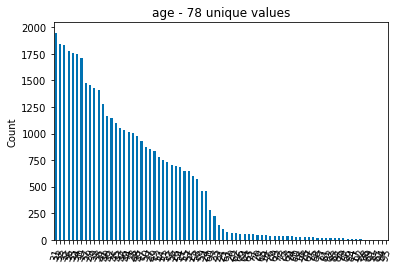

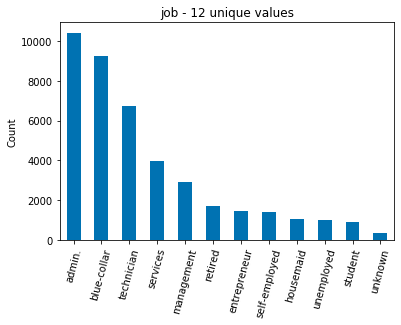

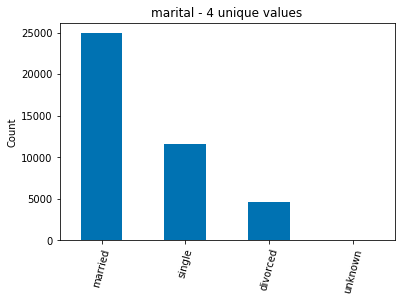

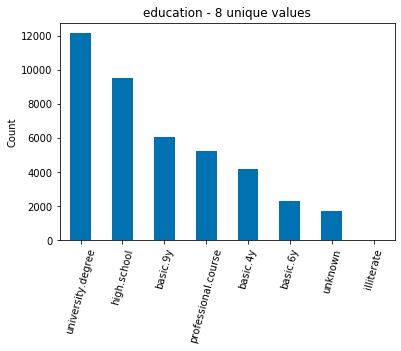

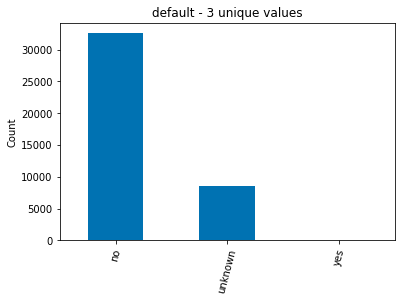

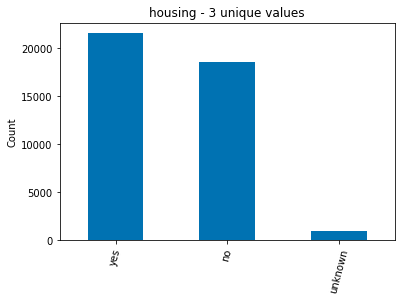

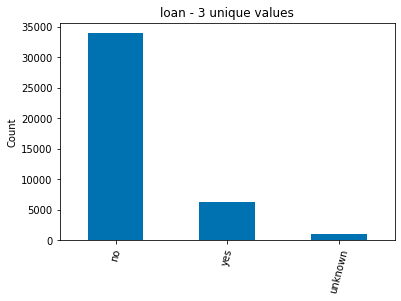

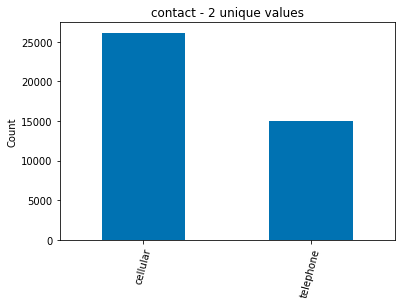

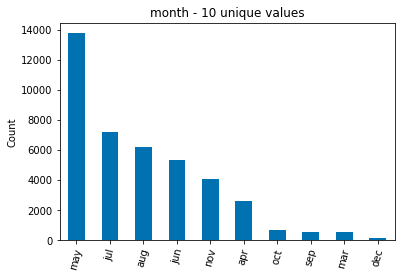

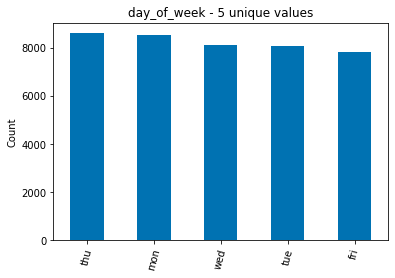

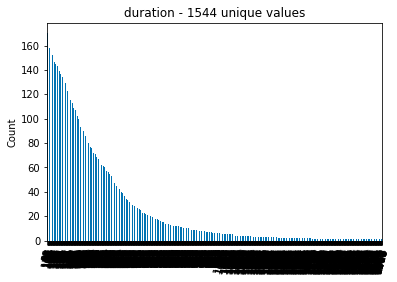

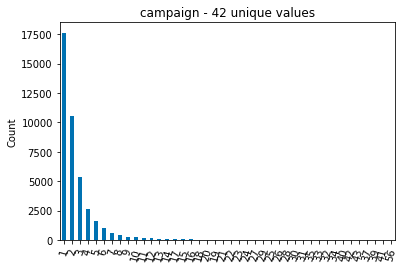

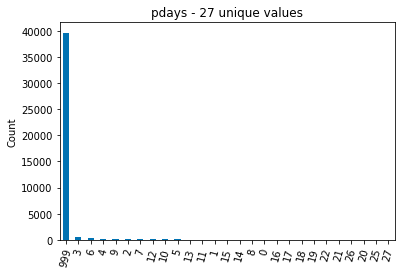

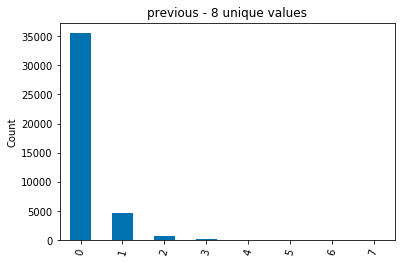

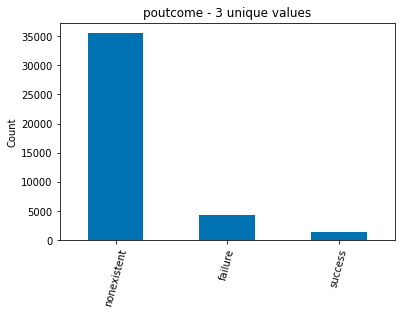

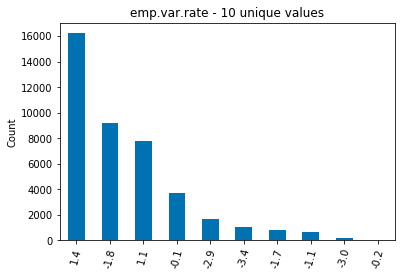

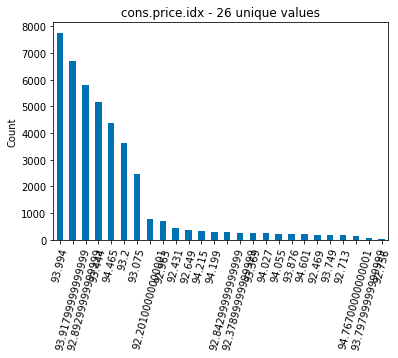

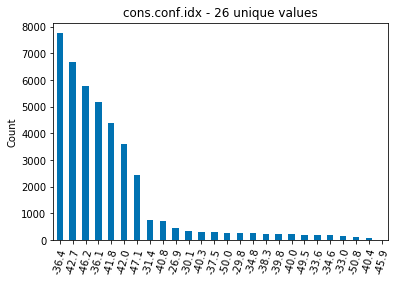

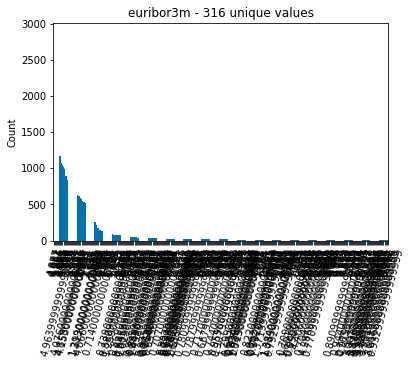

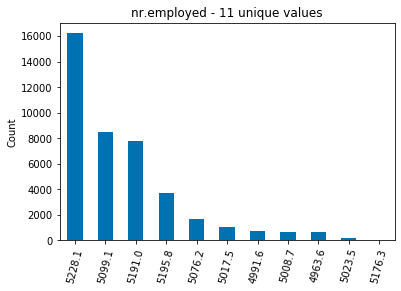

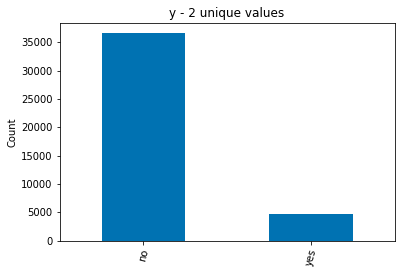

In [44]:
#plot for unique analysis
for i in df.columns:
    plt.figure()
    plt.title(f'{i} - {unique_values[i]} unique values')
    plt.ylabel('Count');
    values=pd.value_counts(df[i]).plot.bar()
    plt.xticks(rotation = 75);   

### Change the index of the dataframe as a unique column

In [ ]:
# Find columns with unique values
unique_columns =[index for  index,values in unique_values.items() if values==len(df) ]
print(f'{unique_columns if unique_columns !=[] else None}')

In [ ]:
unique_column='col1'
df.set_index(unique_column,inplace=True)
df.head()

In [ ]:
documentation_substring= f"\"{unique_column}\" was set as the index column\n"
logging.info(documentation_substring)
documentation_string+=documentation_substring+'\n

### Check which column is numerical and categroical

In [ ]:
interesting= pd.DataFrame(df.dtypes,columns=["Data_Type"])
interesting["First_value"]=df.iloc[0,:]
interesting["Unique_values"]=unique_values
interesting

### Convert numeric to categorical feature

Sometimes categorical values are denoted as numeric (0 and 1). It is better to label them as categorical before splitting.

In [ ]:
df.head()

In [ ]:
df.dtypes

In [ ]:
to_categorical=["col1"]
df[to_categorical]=df[to_categorical].astype(str)

In [ ]:
documentation_substring= f"\"{to_categorical}\" was converted to a categorical column\n"
logging.info(documentation_substring)
documentation_string+=documentation_substring+'\n

### Convert string to datetime feature
It is easier to convert to datetime before splitting

In [ ]:
to_date=["col1"]
df[to_date]=df[to_date].apply(parse)

In [ ]:
documentation_substring= f"\"{to_date}\" was parsed as date-time value\n"
logging.info(documentation_substring)
documentation_string+=documentation_substring+'\n

### Overview of summary based on the target variable

In [ ]:
grouped_values = df.groupby(target)
grouped_summary=grouped_values.mean()
grouped_summary

### Rename columns if needed

In [ ]:
replace_columns={'col1':'col1'}
df.rename(columns=replace_columns,inplace=True)
df.head()

In [ ]:
documentation_substring= f"The following columns were renamed: \n{replace_columns}\n"
logging.info(documentation_substring)
documentation_string+=documentation_substring+'\n

### Drop the target variable from the dataframe

Since we have a target stored as a variable, it is better to seperate it from the rest of the dataframe

In [ ]:
df.drop(columns=target.name,inplace=True)
df.head()

### Get numeric and categorical features

NOTE: Categorical features will also contain timestamps as there may be a chance that it exists as a string datatype

In [47]:
df_numeric=df.select_dtypes(include=['float64', 'int64'])
df_date=df.select_dtypes(include=['datetime64'])
df_categorical=df.select_dtypes(exclude=['float64', 'int64','datetime64'])

In [ ]:
documentation_substring= f"The following columns were categorized as: \nnumeric: {df_numeric.columns}\ncategroical: {df_categorical.columns}\ndate-time: {df_date.columns}\n"
logging.info(documentation_substring)
documentation_string+=documentation_substring+'\n

## Categorical Data

### Remove extra white space in text columns

In [ ]:
for col in df_categorical.columns:
    df_categorical[col] = df_categorical[col].str.strip()

### Bar plot of categorical features

In [ ]:
df_categorical.columns

In [ ]:
df_categorical.info()

In [45]:
def categorical_summarized(dataframe, x=None, y=None, hue=None, palette='Set1', ax=None, order=None, verbose=True):
    '''
    Helper function that gives a quick summary of a given column of categorical data
    Arguments
    =========
    dataframe: pandas dataframe
    x: str. horizontal axis to plot the labels of categorical data, y would be the count
    y: str. vertical axis to plot the labels of categorical data, x would be the count
    hue: str. if you want to compare it another variable (usually the target variable)
    palette: array-like. Colour of the plot
    Returns
    =======
    Quick Stats of the data and also the count plot
    '''
    if x == None:
        column_interested = y
    else:
        column_interested = x
    series = dataframe[column_interested]
    print ('\t', column_interested)
    print(series.describe())
    print('mode: ', series.mode())
    if verbose:
        print('='*80)
        print(series.value_counts())

    sns.countplot(x=x, y=y, hue=hue, data=dataframe, palette=palette)
    plt.show()
    print('\n'*2)

### Univariate analysis

In [ ]:
for col in df_categorical.columns:
    categorical_summarized(df_categorical,y=col)

### Bivariate analysis

In [ ]:
for col in df_categorical.columns:
    categorical_summarized(df_categorical,y=col,hue=target)

### Categorical Data Imputation

#### <span style="color:blue">**(1) Impute missing categorical values with mode**</span> 

In [ ]:
# impute the missing values and create the missing value indicator variables for each non-numeric column.
non_numeric_cols = df_categorical.columns.values
non_numeric_missing_cols=[]
for col in non_numeric_cols:
    missing = df_categorical[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  # only do the imputation for the columns that have missing values.
        print('imputing missing values for: {}'.format(col))
        df_categorical['{}_ismissing'.format(col)] = missing
        non_numeric_missing_cols.append(col) 
        top = df_categorical[col].describe()['top'] # impute with the most frequent value.
        df_categorical[col] = df_categorical[col].fillna(top)

In [ ]:
documentation_substring= f"The Following categorical columns were imputed with mode\n {non_numeric_missing_cols} \n"
logging.info(documentation_substring)
documentation_string+=documentation_substring+'\n

## Chi square analysis

Tests for independence of categorical variables. Requires all categorical variables to be **label encoded** before analysis

In [ ]:
chi_square = df_categorical.apply(LabelEncoder().fit_transform)
chi_scores = chi2(chi_square,target)
chi_scores

In [ ]:
p_values = pd.Series(chi_scores[1],index = chi_square.columns)
p_values.sort_values(ascending = False , inplace = True)
p_values.plot.bar()

### Encoding categorical data
<span style="color:red">**Choose relevant features and encoding methods**</span>

In [ ]:
df_categorical.head()

#### <span style="color:blue">** (1) Label Encoder **</span> 

In [ ]:
label_encoded_variables=['col1']
le = LabelEncoder()
label_encoded=df_categorical[label_encoded_variables].apply(lambda x: le.fit_transform(x))
label_encoded.columns=[label+"_label_encoded" for label in label_encoded_variables]

# Convert to Integer values

In [ ]:
df_categorical.drop(labels=label_encoded_variables, axis=1,inplace=True)
df_categorical[label_encoded.columns] = label_encoded
df_categorical.head()

In [ ]:
documentation_substring= f"The following categorical variables were label encoded \n {label_encoded_variables} \n"
logging.info(documentation_substring)
documentation_string+=documentation_substring+'\n

#### <span style="color:blue">** (2) Label Encoder with Weights  **</span> 

In [ ]:
num_encoded_variables=['col1']
num_encode = {'col1' : {'YES':1, 'NO':0},
              'col1'  : {'WON':1, 'LOSE':0, 'DRAW':0}}  
df_categorical.replace(num_encode, inplace=True) 

In [ ]:
label_encoded=df_categorical[num_encoded_variables].replace(num_encode) 
label_encoded.columns=[label+"_label_encoded" for label in num_encoded_variables] 
label_encoded.head()

In [ ]:
df_categorical.drop(labels=num_encoded_variables, axis=1,inplace=True)
df_categorical[label_encoded.columns] = label_encoded
df_categorical.head()

In [ ]:
documentation_substring= f"The following categorical variables were label encoded with weights\n {num_encoded_variables} \n"
logging.info(documentation_substring)
documentation_string+=documentation_substring+'\n

#### <span style="color:blue">** (3) One Hot Encoder  **</span> 

In [ ]:
one_hot_variables=['col1']
df_categorical=pd.get_dummies(data=df_categorical, columns=one_hot_variables,dummy_na=True)
df_categorical.head()

In [ ]:
documentation_substring= f"The following categorical variables were label encoded with weights\n {one_hot_variables} \n"
logging.info(documentation_substring)
documentation_string+=documentation_substring+'\n

## Finalized Categorical columns

In [ ]:
df_categorical.head()

## Date-Time data 

<span style="color:red">**Make sure that the data related to time is a relevant feature (Classification models cannot use datetime variables)**</span>

<span style="color:green">**Needs more fine tuning**</span>

#### Convert timestamp(from string to datetime format)

In [ ]:
df_date['timestamp']=pd.to_datetime(df_categorical['col1'], format='%Y-%m-%d %H:%M:%S.%f'))

In [ ]:
df_date

In [ ]:
x_values = [datetime.strptime(d,"%m/%d/%Y").date() for d in df_date['col1']]
y_values = col1

ax = plt.gca()
formatter = mdates.DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(formatter)
locator = mdates.DayLocator()
ax.xaxis.set_major_locator(locator)
plt.plot(x_values, y_values)

#### Pull Day, month year if the timestamp is a string

In [ ]:
df_date['date'] = pd.to_datetime(df_date['timestamp'], format='%Y-%m-%d')
df_date['year'] = df_date['date'].dt.year
df_date['month'] = df_date['date'].dt.month
df_date['day'] = df_date['date'].dt.day
df_date['weekday'] = df_date['timestamp_dt'].dt.weekday

In [ ]:
df_date['hour'] = df_date['date'].dt.hour
df_date['minute'] = df_date['date'].dt.minute

#### Show Days Of The Week

In [ ]:
df_date['weekday'] = df_date.date.weekday()

#### Difference between two dates

In [ ]:
df_date['date_difference']=abs((d2 - d1).days)

#### Drop the orginal timestamp columns

In [ ]:
del(df_date['col1'])

## Finalized Date columns

In [ ]:
df_date.head()

## Numeric data

### Univariate analysis

### Histogram of numeric features

In [ ]:
df_numeric.head()

In [ ]:
df_numeric.hist(figsize=(20, 20), bins=10, xlabelsize=8, ylabelsize=8);

### General Statistical Insights

In [ ]:
def quantitative_summarized(dataframe, x=None, y=None, hue=None, palette='Set1', ax=None, order=None, verbose=True):
    '''
    Helper function that gives a quick summary of quantattive data
    Arguments
    =========
    dataframe: pandas dataframe
    x: str. horizontal axis to plot the labels of categorical data (usually the target variable)
    y: str. vertical axis to plot the quantitative data
    hue: str. if you want to compare it another categorical variable (usually the target variable if x is another variable)
    palette: array-like. Colour of the plot
    Returns
    =======
    Quick Stats of the data and also the violin plot of the distribution
    '''
    series = dataframe[y]
    print ('\t', y)
    print(series.describe())
    print('mode: ', series.mode())
    print('Unique values: ', series.unique().size)
    if verbose:
        print('\n'*2)
        print(series.value_counts())
    
    sns.violinplot(x=x, y=y, hue=hue, data=dataframe,
                palette=palette, order=order, ax=ax)
    

    plt.show()
    print('\n'+'#'*80+'\n')

### Univariate numeric analysis

In [ ]:
for col in df_numeric.columns:
    quantitative_summarized(df_numeric,y=col, verbose=False)

### Bivariate numeric analysis

In [ ]:
for col in df_numeric.columns:
    quantitative_summarized(dataframe= df_numeric, y = col, palette=c_palette, x = target, verbose=False)

### Multivariate numeric analysis

Use to see which 2 columns that sould be analyzed based on target column

In [ ]:
quantitative_summarized(dataframe= df_numeric, y = 'col1', x = 'col1', hue = target, palette=c_palette3, verbose=False)

### Binning numeric columns

Either by equal range/width (cut) or by equal frequencies(qcut)

In [ ]:
#If based on equal width, Use Sturge’s Rule to estimate the number of bins

sturge_value=1 + 3.322 *log(df_numeric.size)
print ("Optimal bins:", ceil(sturge_value))


In [ ]:
#Shows estimation
pd.cut(df_numeric['col1'],44).value_counts()

In [ ]:
#Model friendly version - Labeled within binned category
df_numeric_binned= pd.cut(df_numeric['col1'],44,labels=False)

#Side-by-side comparison
pd.DataFrame({'col1':df_numeric['col1'], 'col1_binned':df_numeric_binned}).head()

In [ ]:
df_numeric['col1'].plot(kind='hist')

In [ ]:
df_numeric_binned.plot(kind='hist')

In [ ]:
#append to the original dataframe

binned_name=df_numeric_binned.name
df_numeric.drop(labels=binned_name, axis=1,inplace = True)
df_numeric= pd.concat([df_numeric, df_numeric_binned], axis=1)
df_numeric.head()

In [ ]:
documentation_substring= f"The following categorical variables were binned\n {binned_name} \n"
logging.info(documentation_substring)
documentation_string+=documentation_substring+'\n

### Handling outliers 

In [ ]:
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1
pd.DataFrame([Q1,Q3,IQR])

In [ ]:
# Shows all outliers
df_numeric_outliers = df_numeric[((df_numeric < (Q1 - 1.5 * IQR)) |(df_numeric > (Q3 + 1.5 * IQR))).any(axis=1)]
df_numeric_outliers.head()
print (df_numeric_outliers.head())
print ('\n',df_numeric_outliers.shape)


In [ ]:
#This is present to remove any of the outliers 
df_numeric = df_numeric[~df_numeric.index.isin(df_numeric_outliers.index)]
df_numeric.shape

### Dataframe after eliminating outliers

In [ ]:
df_numeric.info()

In [ ]:
df_numeric.describe()

### Skewedness and Kurtosis distributions

### Skewedness

* If skewness is less than −1 or greater than +1, the distribution is highly skewed.
* If skewness is between −1 and −½ or between +½ and +1, the distribution is moderately skewed.
* If skewness is between −½ and +½, the distribution is approximately symmetric.

### Kurtosis 

* A normal distribution has kurtosis exactly 3 (excess kurtosis exactly 0). Any distribution with kurtosis ≈3 (excess ≈0) is called mesokurtic.
* A distribution with kurtosis <3 (excess kurtosis <0) is called platykurtic. Compared to a normal distribution, its tails are shorter and thinner, and often its central peak is lower and broader.
* A distribution with kurtosis >3 (excess kurtosis >0) is called leptokurtic. Compared to a normal distribution, its tails are longer and fatter, and often its central peak is higher and sharper.

In [ ]:
df_numeric_orientation = pd.DataFrame({"Skewedness":df_numeric.skew(),"Kurtosis":df_numeric.kurt()})
df_numeric_orientation

### Reduce memory load by converting to 32-bits

<span style="color:red">**Confirm that the data values do not matter when downsizing**</span>

In [ ]:
# Change the dtypes (int64 -> int32)
df_numeric[['col1']] = df_numeric[['col1']].astype('int32')

# Change the dtypes (float64 -> float32)
df_numeric[['col1']] = df_numeric[['col1']].astype('float32')

### Find qunatiles for each numeric value 

In [ ]:
quantile_check=df_numeric.quantile([.1, .25, .5, .75], axis = 0)
quantile_check

### Normalize Numeric features

#### MinMax Scaler

In [ ]:
cols=['col1']
scaled_variables = df_numeric[cols].values.astype(float)
min_max_scaler = MinMaxScaler()
min_max_scaled = min_max_scaler.fit_transform(scaled_variables)
min_max_scaled[:5]

In [ ]:
bc_cols = [f'min_max_{c}' for c in cols]
df_numeric=pd.concat([df_numeric, pd.DataFrame(min_max_scaled, columns=bc_cols)], axis='columns')
ds.head()

In [ ]:
#Original Visualization
df_numeric[cols].hist(layout=(2, 6), figsize=(15, 4));

In [ ]:
#Min_max transformed
df_numeric[bc_cols].hist(layout=(2, 6), figsize=(15, 4), color='orange', alpha=.5);

In [ ]:
#Choose to drop the original
df_numeric.drop(['col1'], axis=1, inplace=True) 

In [ ]:
documentation_substring= f"The following numeric columns were MinMaxed scaled\n {cols} \n"
logging.info(documentation_substring)
documentation_string+=documentation_substring+'\n

#### Yeo-Johnson transform


In [ ]:
cols=['col1']
scaled_variables = df_numeric[cols].values.astype(float)
yeo_johnson_scaler = PowerTransformer(method='yeo-johnson')
yeo_scaled = yeo_johnson_scaler.fit_transform(scaled_variables)
yeo_scaled[:5]

In [ ]:
bc_cols = [f'yeo_johnson_{c}' for c in cols]
df_numeric=pd.concat([df_numeric, pd.DataFrame(yeo_scaled, columns=bc_cols)], axis='columns')
ds.head()  

In [ ]:
#Original Visualization
df_numeric[cols].hist(layout=(2, 6), figsize=(15, 4));

In [ ]:
#Yeo-Johnsontransformed
df_numeric[bc_cols].hist(layout=(2, 6), figsize=(15, 4), color='orange', alpha=.5);

In [ ]:
#Choose to drop the original
df_numeric.drop(['col1'], axis=1, inplace=True) 

In [ ]:
documentation_substring= f"The following numeric columns were YeoJonson scaled\n {cols} \n"
logging.info(documentation_substring)
documentation_string+=documentation_substring+'\n

#### <span style="color:blue">**(1) Impute all missing numeric data with Median**</span> 

In [ ]:
# impute the missing values and create the missing value indicator variables for each numeric column.
numeric_cols = df_numeric.columns.values
missing_numeric_cols=[]
for col in numeric_cols:
    missing = df_numeric[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  # only do the imputation for the columns that have missing values.
        print(f'imputing missing values for: {col} - Missing {num_missing} values')
        missing_numeric_cols.append(col)
        med = df_numeric[col].median()
        df_numeric[col] = df_numeric[col].fillna(med)

print("All collumns checked") 

In [ ]:
documentation_substring= f"The following numeric columns were imputed with Median \n {missing_numeric_cols} \n"
logging.info(documentation_substring)
documentation_string+=documentation_substring+'\n

#### <span style="color:blue">**(2) Using SimpleImputer**</span> 

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
df_numeric = imputer.fit_transform(df_numeric)

#### <span style="color:blue">**(3) Using KNNImputer**</span> 

#### <span style="color:red">**The data needs to be normalized beforehand (transformations are done prior)**</span> 

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer()
df_numeric = imputer.fit_transform(df_numeric)

#### DataFrame transformations

<span style="color:red">**Make sure the relevant columns are transformed accordingly**</span>

In [ ]:
#Create a new colum based on the sum of two values
df_numeric['Total_col'] = df_numeric['col1'] + df_numeric['col2']

In [ ]:
documentation_substring= f"New transformations were created\n"
logging.info(documentation_substring)
documentation_string+=documentation_substring+'\n

### Check if the target variable needs to be encoded

In [ ]:
target.head()

In [ ]:
le = LabelEncoder()
target = le.fit_transform(target)
target[:5]

## Finalized Numeric columns

In [ ]:
df_numeric.head()

### Combine all the features

In [ ]:
df_target= pd.DataFrame(target.astype(int),columns=[target_name])
df_target.head()

In [ ]:
df_combined= pd.concat([df_numeric, df_categorical,df_date,df_target], axis=1)

In [ ]:
df_combined.head()

In [ ]:
#Checking if there are any null values in the final dataframe.
df_combined.info()

In [ ]:
# Removing any null values as they were removed due to a numeric/ categorical abnormality
df_combined.dropna(axis=0,inplace = True)

## Saving the overall dataframe

#### <span style="color:blue">**(1) As a CSV**</span> 

In [ ]:
df_combined.to_csv("transformed_data.csv",index=False)
print("Dataframe stored as a CSV")

#### <span style="color:blue">**(2) As a pickle**</span> 

In [ ]:
df_combined.to_pickle("./transformed_data.pkl")
print("Dataframe stored as a pickle")

## Print all the documentation

In [ ]:
print (documentation_string)

## Conclusion

There are a lot of detailed feature analysis that needs to be performed on datasets before they can be deployed as a perfect dataset. This framework brings to light some of the more common EDA steps that one takes on models